In [32]:
import pandas as pd
df = pd.read_csv("aggregated_results.csv")

In [33]:
df['Success Rate'] = df['Success Rate'].str.rstrip('%').astype('float')

In [34]:
df['Success Rate'][0]

99.11

In [35]:
df.head(5)

,Test Type,Model,Provider,Method,Trial,Runs,Average Attempts,Average Score,Success Rate,Average Time (s)
0,GenerateAnswerWithConfidence,llama3:instruct,ollama,fstring,results-trial-1,1,112.0,111.0,99.11,836.07
1,GenerateAnswerWithConfidence,llama3:instruct,ollama,ff,results-trial-2,1,112.0,105.0,93.75,968.98
2,GenerateAnswerWithConfidence,gemini-1.5-pro,google,fstring,results-trial-3,1,112.0,112.0,100.00,225.46
3,GenerateAnswerWithConfidence,gemini-1.5-pro,google,ff,results-trial-4,1,112.0,112.0,100.00,312.75
4,AssessAnswerability,llama3:instruct,ollama,fstring,results-trial-1,1,112.0,112.0,100.00,80.95


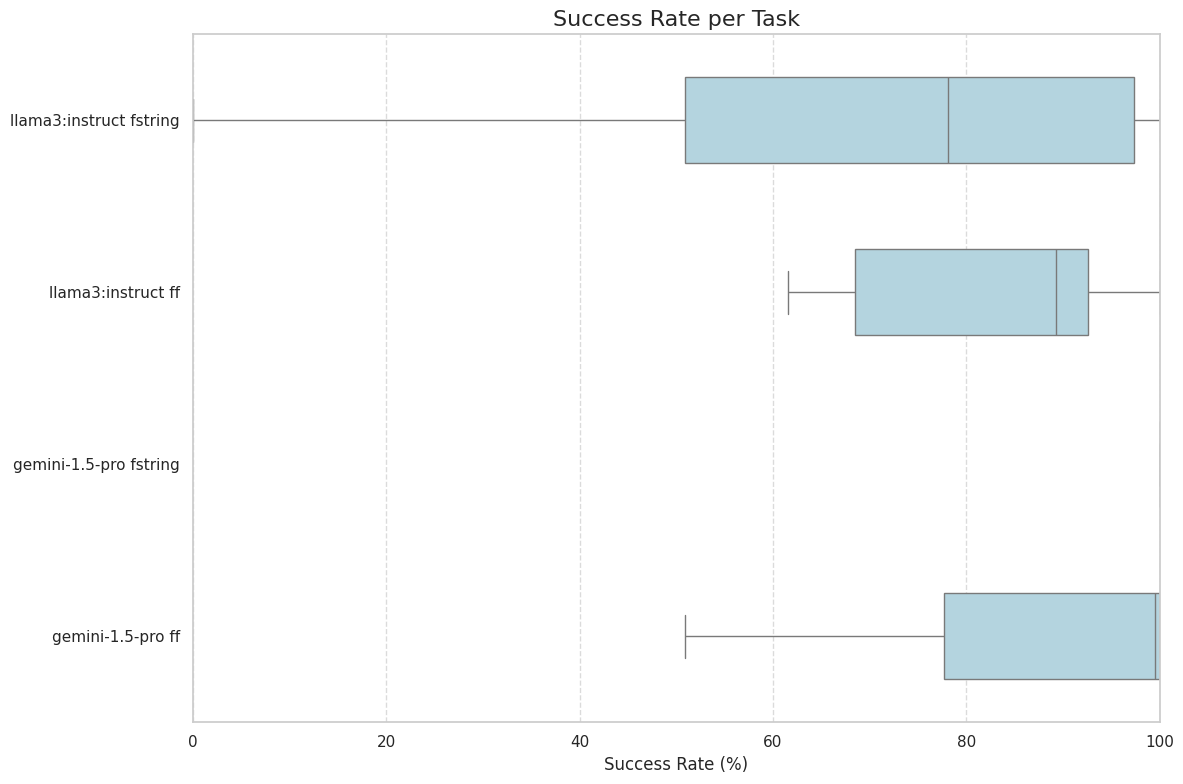

                         count     mean        std     min      25%      50%  \
Model_Method                                                                   
gemini-1.5-pro ff          6.0   86.755  21.108830   50.89   77.680   99.550   
gemini-1.5-pro fstring     6.0  100.000   0.000000  100.00  100.000  100.000   
llama3:instruct ff         6.0   76.490  28.463809   25.00   68.530   89.290   
llama3:instruct fstring    6.0   66.965  39.147197    0.00   50.895   78.125   

                              75%    max  
Model_Method                              
gemini-1.5-pro ff        100.0000  100.0  
gemini-1.5-pro fstring   100.0000  100.0  
llama3:instruct ff        92.6350  100.0  
llama3:instruct fstring   97.3225  100.0  


In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new column combining Model and Method
df['Model_Method'] = df['Model'] + ' ' + df['Method']

# Create the plot
plt.figure(figsize=(12, 8))

# Create box plot without outliers
sns.boxplot(x='Success Rate', y='Model_Method', data=df,
            orient='h', color='lightblue', width=0.5, fliersize=0)

# Customize the plot
plt.title('Success Rate per Task', fontsize=16)
plt.xlabel('Success Rate (%)', fontsize=12)
plt.ylabel('')  # Remove y-axis label as it's self-explanatory

# Set x-axis to show full range from 0 to 100
plt.xlim(0, 100)

# Add gridlines
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Improve readability
plt.tight_layout()

# Show the plot
plt.show()

# Print summary statistics
print(df.groupby('Model_Method')['Success Rate'].describe())

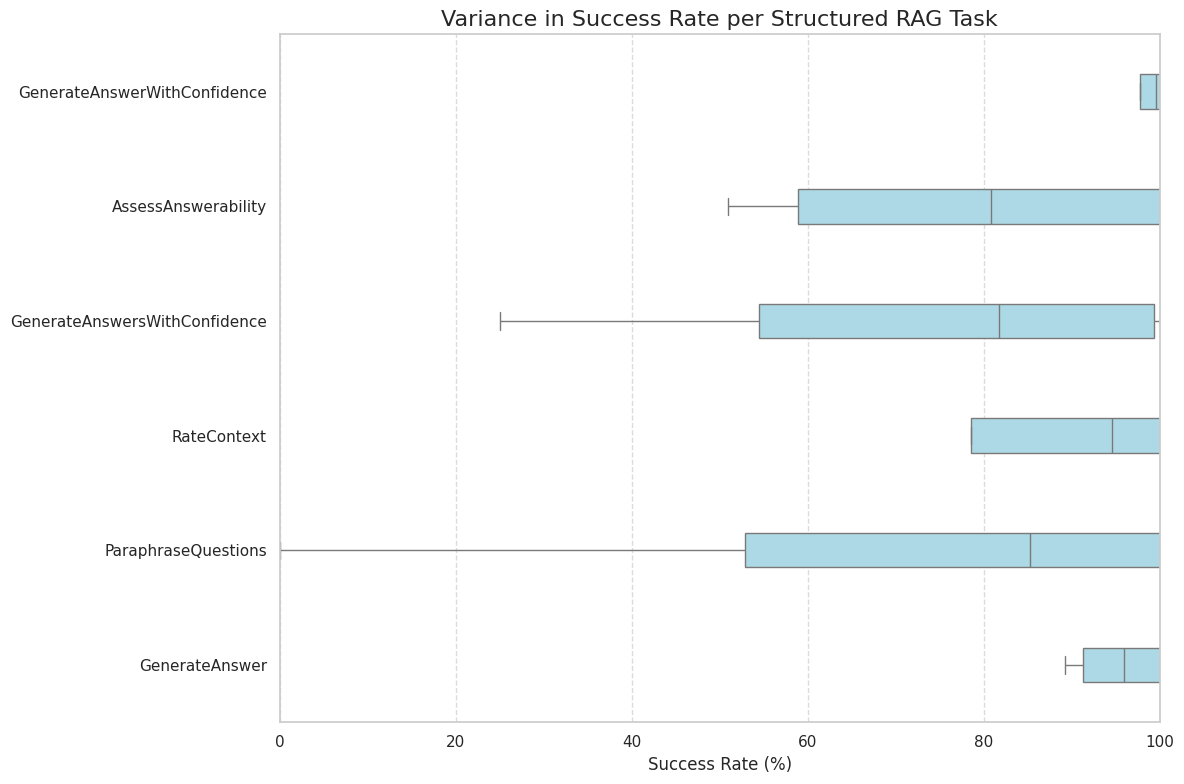

                               count     mean        std    min      25%  \
Test Type                                                                  
AssessAnswerability              4.0  78.1250  25.635403  50.89  58.9300   
GenerateAnswer                   4.0  95.3125   5.521325  89.29  91.2925   
GenerateAnswerWithConfidence     4.0  98.2150   3.006088  93.75  97.7700   
GenerateAnswersWithConfidence    4.0  72.0975  35.528468  25.00  54.4675   
ParaphraseQuestions              4.0  67.6350  47.180217   0.00  52.9050   
RateContext                      4.0  83.9300  25.504702  46.43  78.5750   

                                  50%      75%    max  
Test Type                                              
AssessAnswerability            80.805  100.000  100.0  
GenerateAnswer                 95.980  100.000  100.0  
GenerateAnswerWithConfidence   99.555  100.000  100.0  
GenerateAnswersWithConfidence  81.695   99.325  100.0  
ParaphraseQuestions            85.270  100.000  100.0  

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(12, 8))

# Overlay box plot
sns.boxplot(x='Success Rate', y='Test Type', data=df,
            orient='h', width=0.3, color='lightblue', saturation=1, fliersize=0)

# Customize the plot
plt.title('Variance in Success Rate per Structured RAG Task', fontsize=16)
plt.xlabel('Success Rate (%)', fontsize=12)
plt.ylabel('')  # Remove y-axis label as it's self-explanatory

# Set x-axis to show full range from 0 to 100
plt.xlim(0, 100)

# Add gridlines
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Improve readability
plt.tight_layout()

# Show the plot
plt.show()

# Print summary statistics
print(df.groupby('Test Type')['Success Rate'].describe())

<Figure size 1600x800 with 0 Axes>

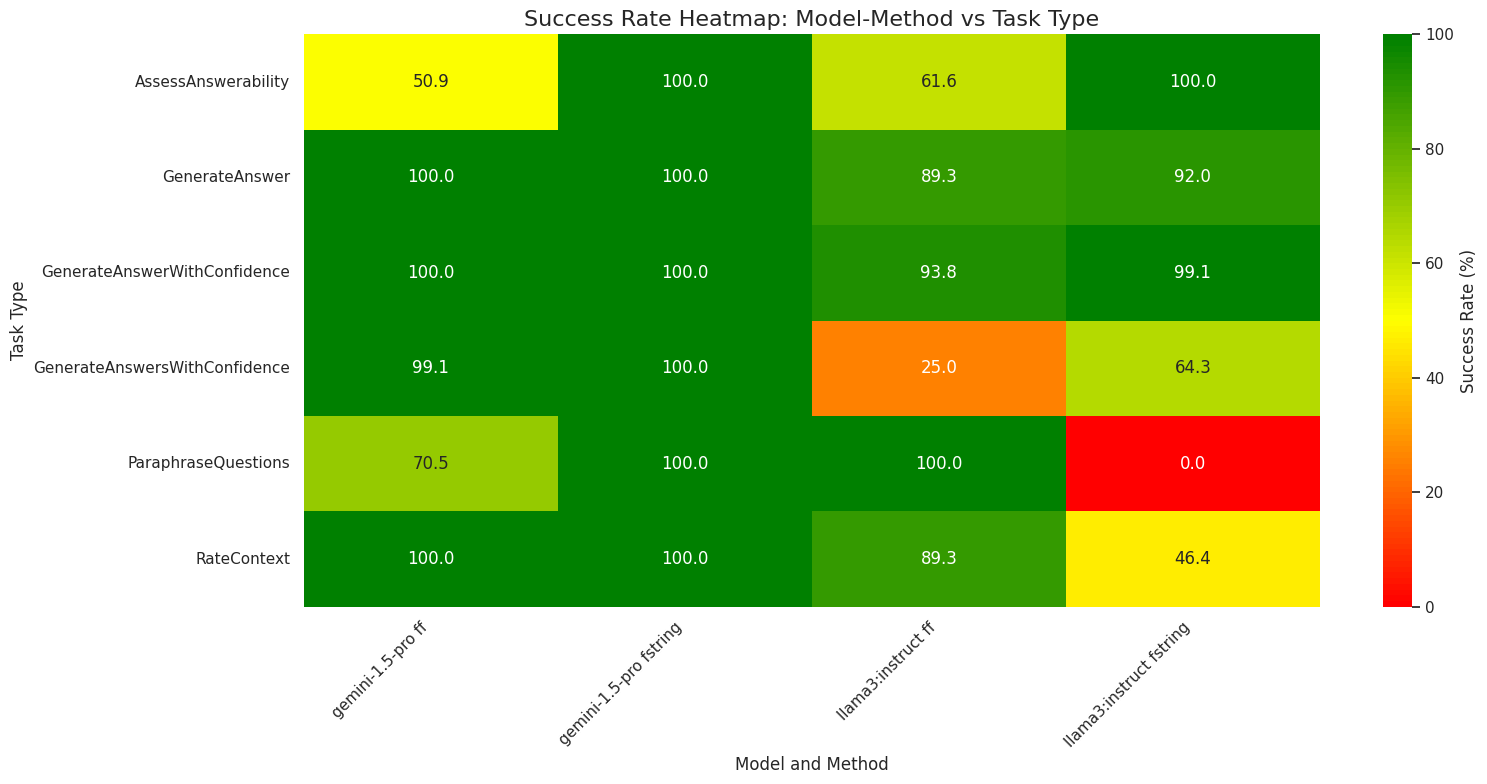

Model_Method                   gemini-1.5-pro ff  gemini-1.5-pro fstring  \
Test Type                                                                  
AssessAnswerability                        50.89                   100.0   
GenerateAnswer                            100.00                   100.0   
GenerateAnswerWithConfidence              100.00                   100.0   
GenerateAnswersWithConfidence              99.10                   100.0   
ParaphraseQuestions                        70.54                   100.0   
RateContext                               100.00                   100.0   

Model_Method                   llama3:instruct ff  llama3:instruct fstring  
Test Type                                                                   
AssessAnswerability                         61.61                   100.00  
GenerateAnswer                              89.29                    91.96  
GenerateAnswerWithConfidence                93.75                    99.11  
Genera

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Combine Model and Method columns
df['Model_Method'] = df['Model'] + ' ' + df['Method']

# Create a pivot table for the heatmap
heatmap_data = df.pivot_table(values='Success Rate',
                              index='Test Type',
                              columns='Model_Method',
                              aggfunc='mean')

# Create the heatmap
plt.figure(figsize=(16, 8))  # Increased width to accommodate more columns

# Create a custom colormap from red to green
colors = ['red', 'yellow', 'green']
n_bins = 100
cmap = LinearSegmentedColormap.from_list('custom', colors, N=n_bins)

# Create the heatmap
plt.figure(figsize=(16, 8))  # Increased width to accommodate more columns
sns.heatmap(heatmap_data, annot=True, cmap=cmap, fmt='.1f',
            cbar_kws={'label': 'Success Rate (%)'}, vmin=0, vmax=100)


# Customize the plot
plt.title('Success Rate Heatmap: Model-Method vs Task Type', fontsize=16)
plt.xlabel('Model and Method', fontsize=12)
plt.ylabel('Task Type', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Improve readability
plt.tight_layout()

# Show the plot
plt.show()

# Print the heatmap data for reference
print(heatmap_data)